In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
incident = pd.read_csv('incident_cleaned_final.csv')

/var/folders/h1/kwz10shx6gv77h3fhd8q3nh80000gn/T/ipykernel_52399/970906824.py:1: DtypeWarning: Columns (18,32,35) have mixed types. Specify dtype option on import or set low_memory=False.
  incident = pd.read_csv('incident_cleaned_final.csv')


In [3]:
# Fire station apparatus list
fire_station_apparatus = {
    'Engine 19': ['E19', 'Q1', 'M1', 'FIREBOAT1'],
    'Engine 10 / Truck 2': ['T2', 'E10', 'Q2', 'M2', 'CAR91', 'CAR92', 'CAR93', 'CAR94', 'CAR98'],
    'Engine 2': ['E2', 'Q6', 'M6', 'WR1', 'SO2'],
    'Engine 16 / Truck 6': ['E16', 'T6', 'B1'],
    'Engine 9': ['E9', 'Q7', 'M7'],
    'Engine 12': ['E12'],
    'Truck 4': ['T4', 'Q4', 'M4'],
    'Engine 1': ['E1', 'M9', 'Q9', 'CAR99'],
    'Engine 17 / Rescue 11': ['E17', 'R11', 'LDC', 'P', 'HM1', 'HM2'],
    'Engine 13 / Truck 10': ['E13', 'T10', 'Q8', 'M8', 'B2', 'SO1', 'TR1', 'TR2'],
    'Engine 5': ['E5'],
    'Engine 3': ['E3'],
    'Truck 5': ['T5', 'Q5', 'M5'],
    'Engine 7': ['E7'],
    'Truck 3': ['T3', 'E33', 'Q3', 'M3'],
}

# Utilization of each unit per Fire Station

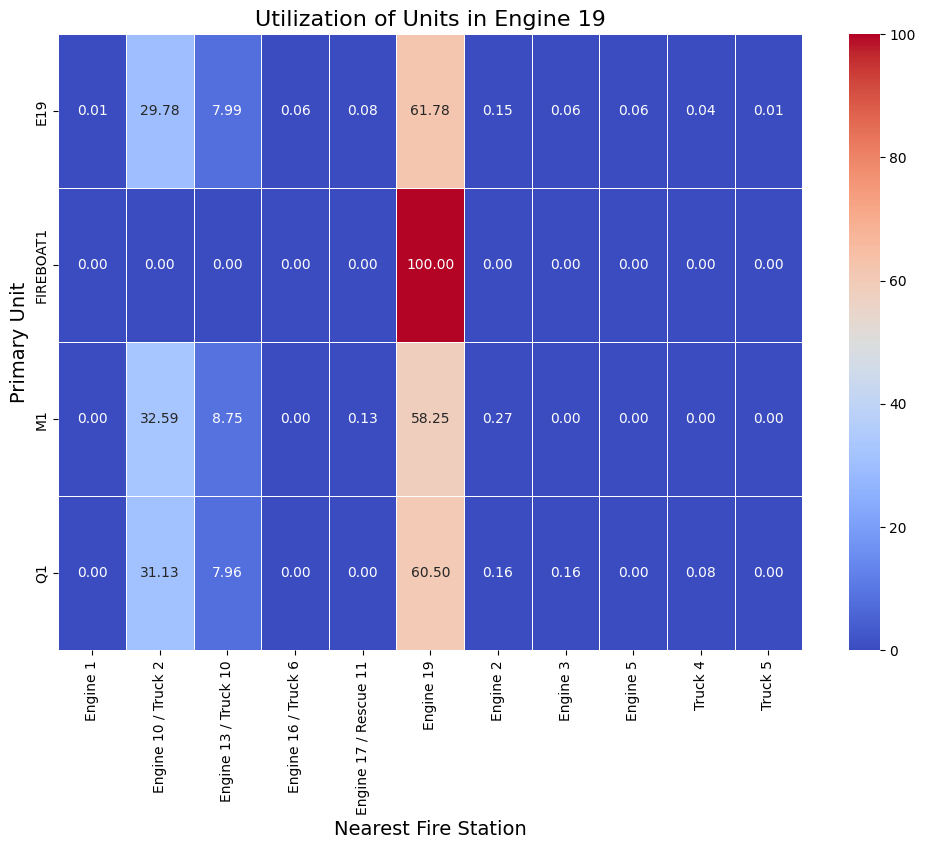

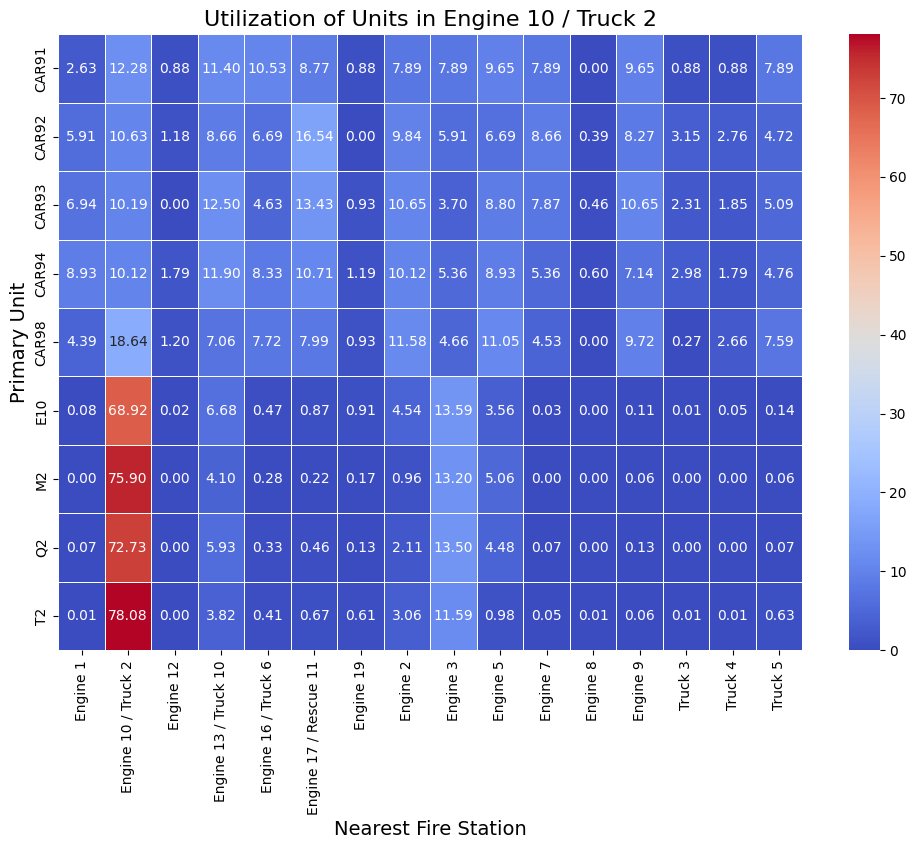

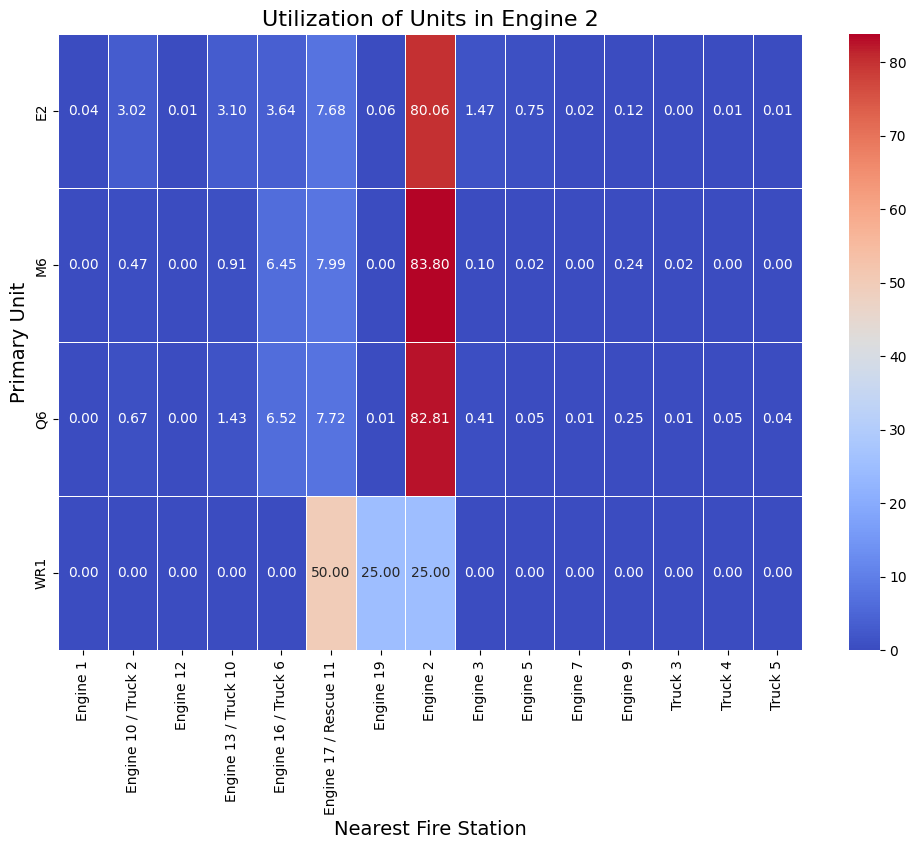

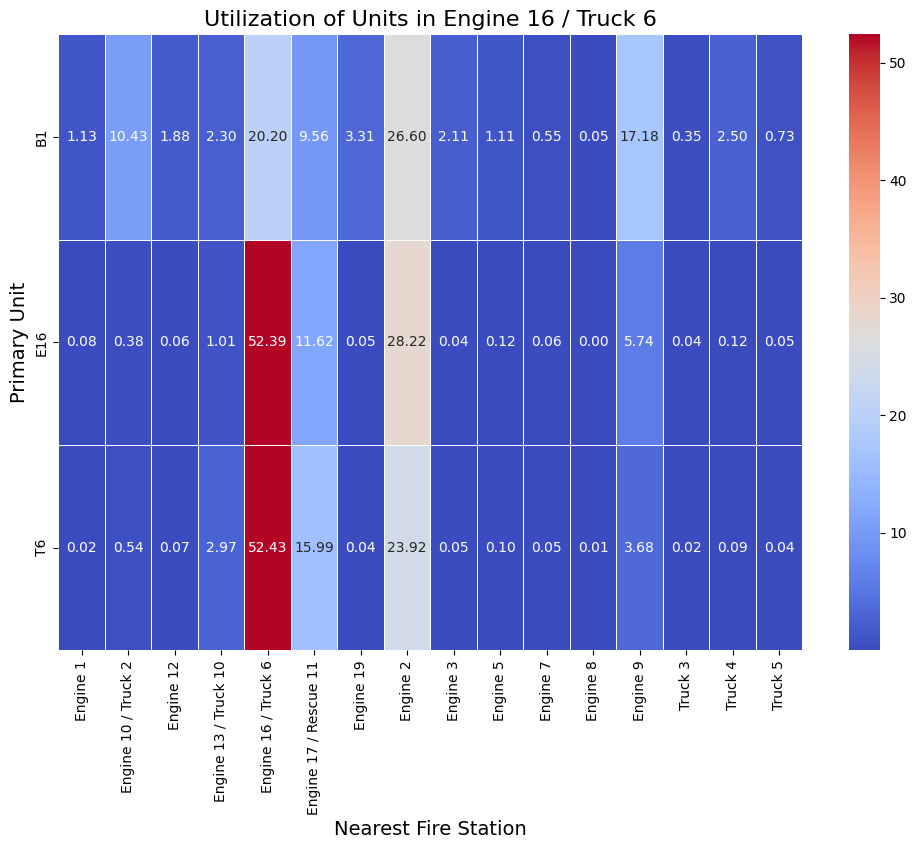

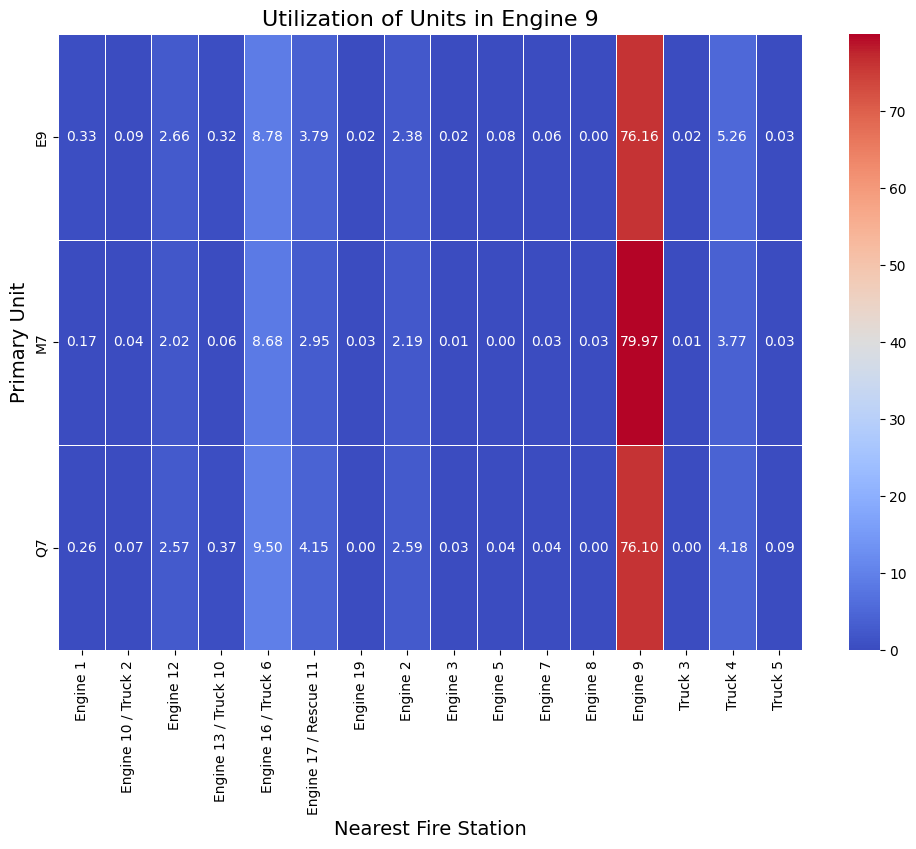

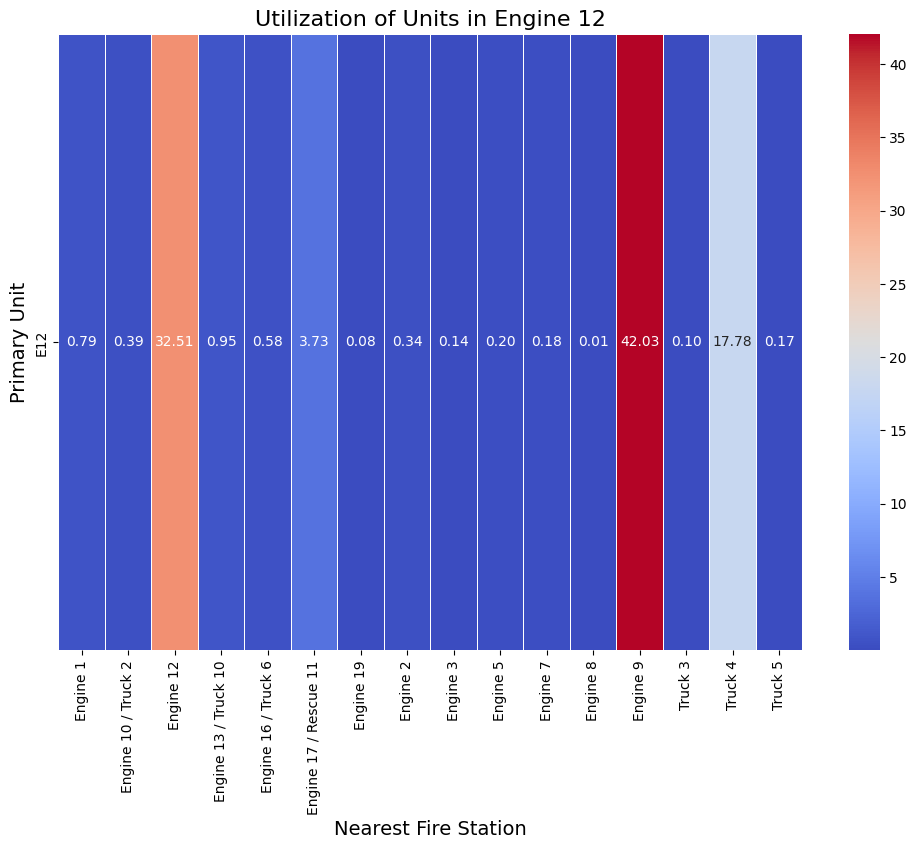

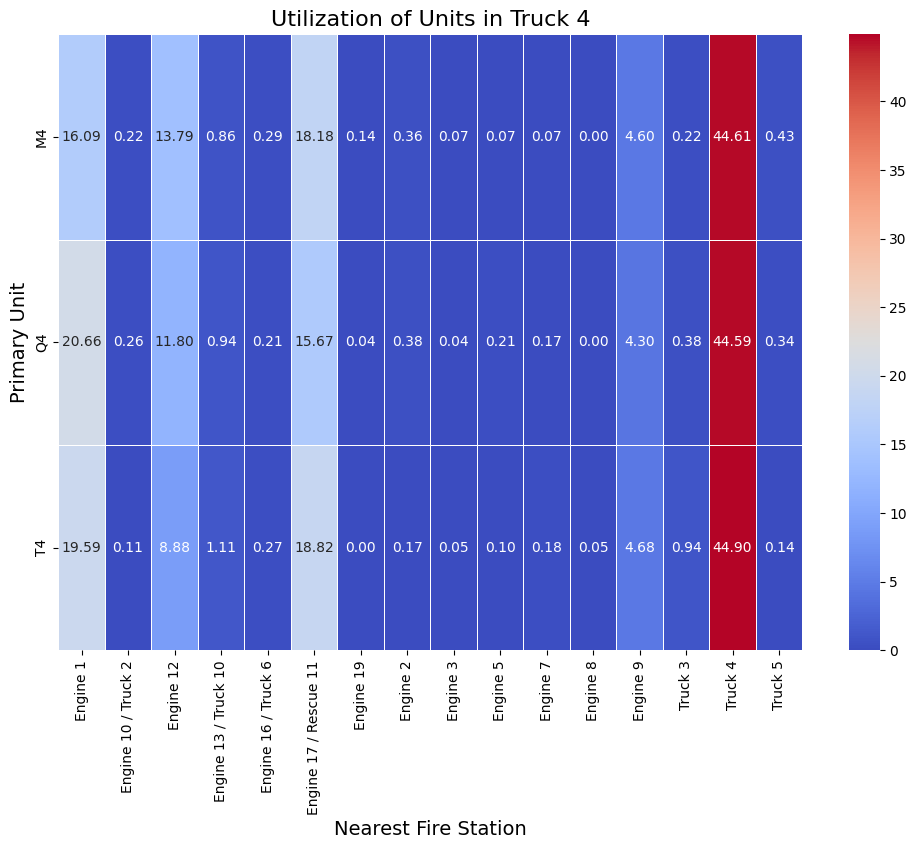

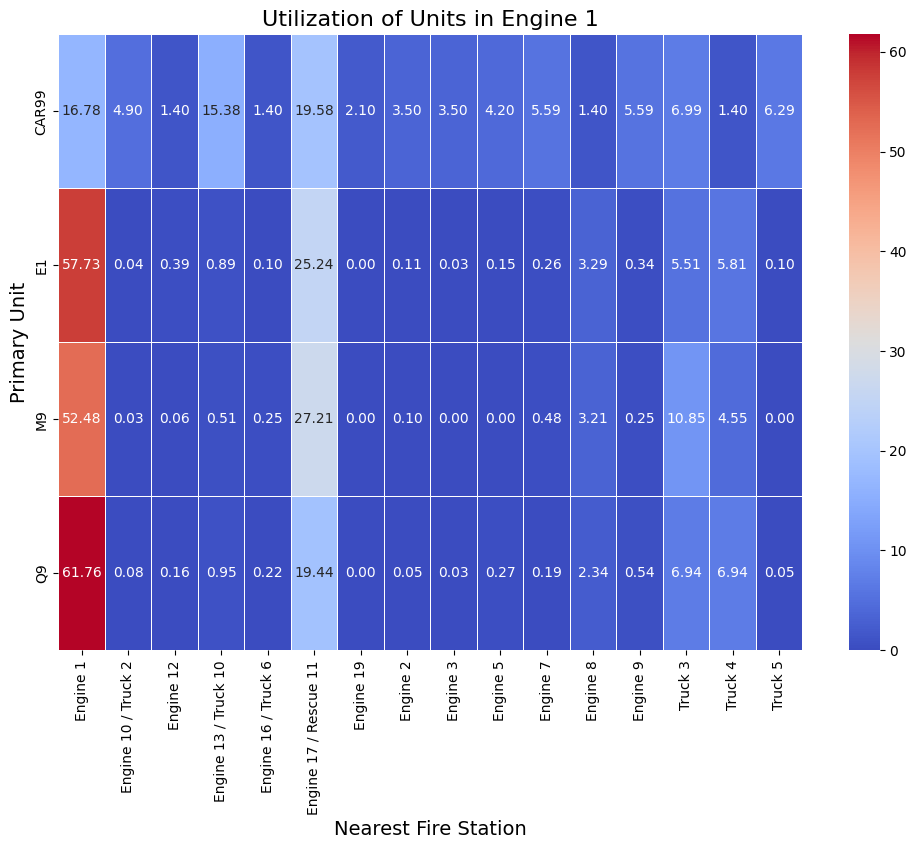

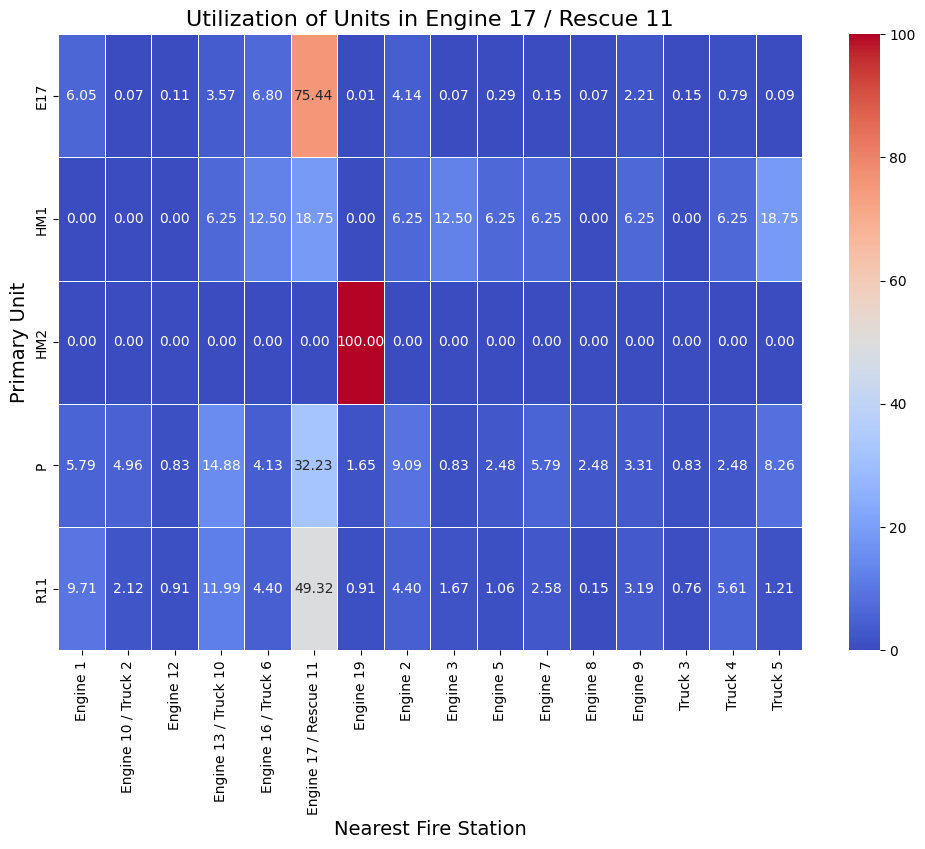

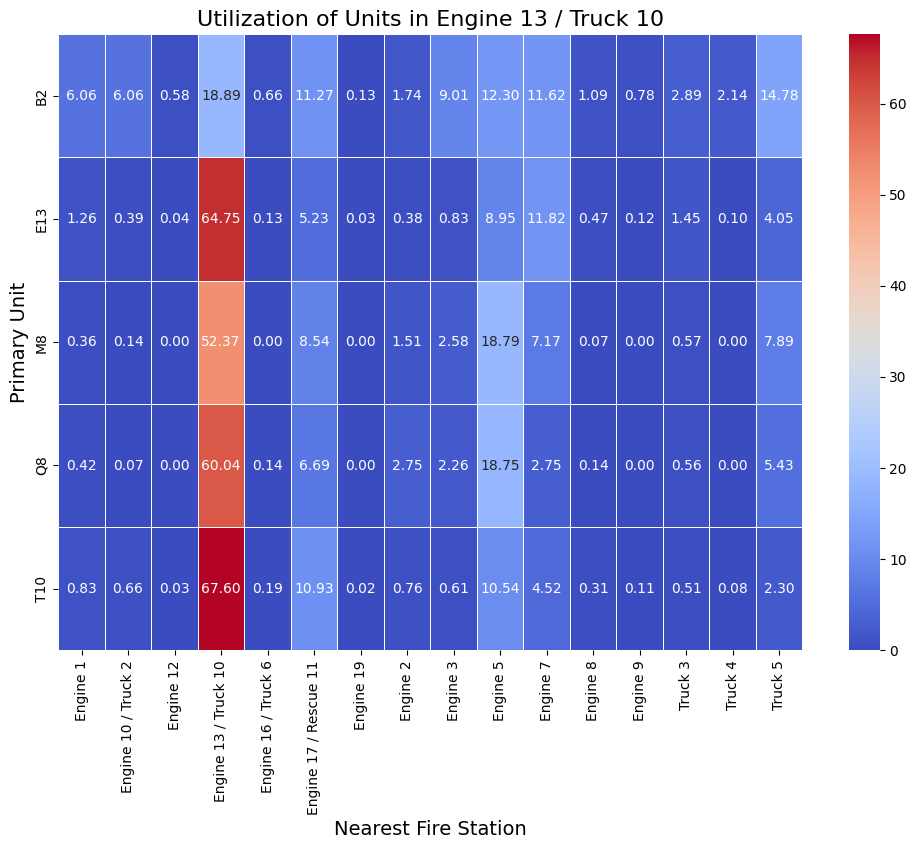

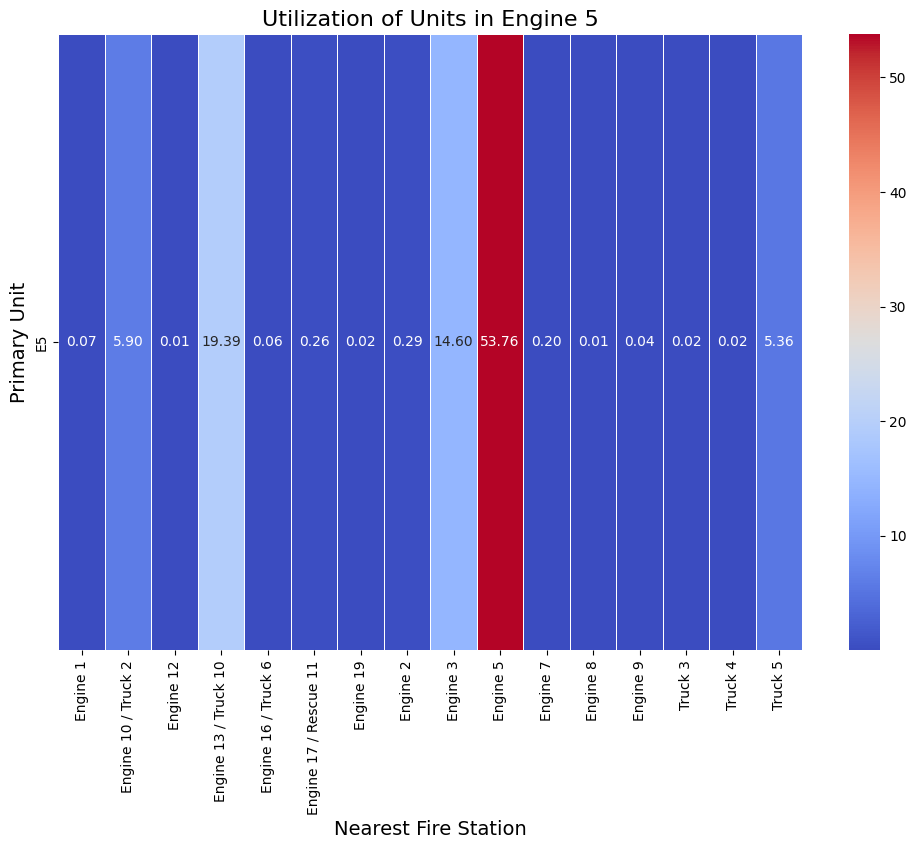

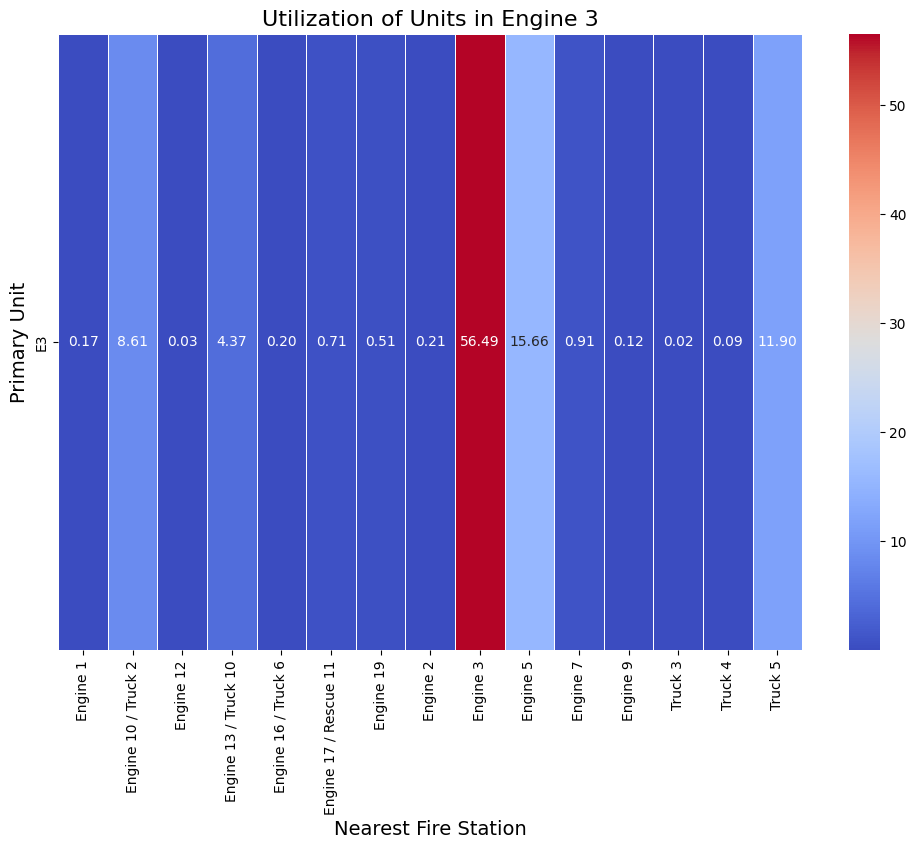

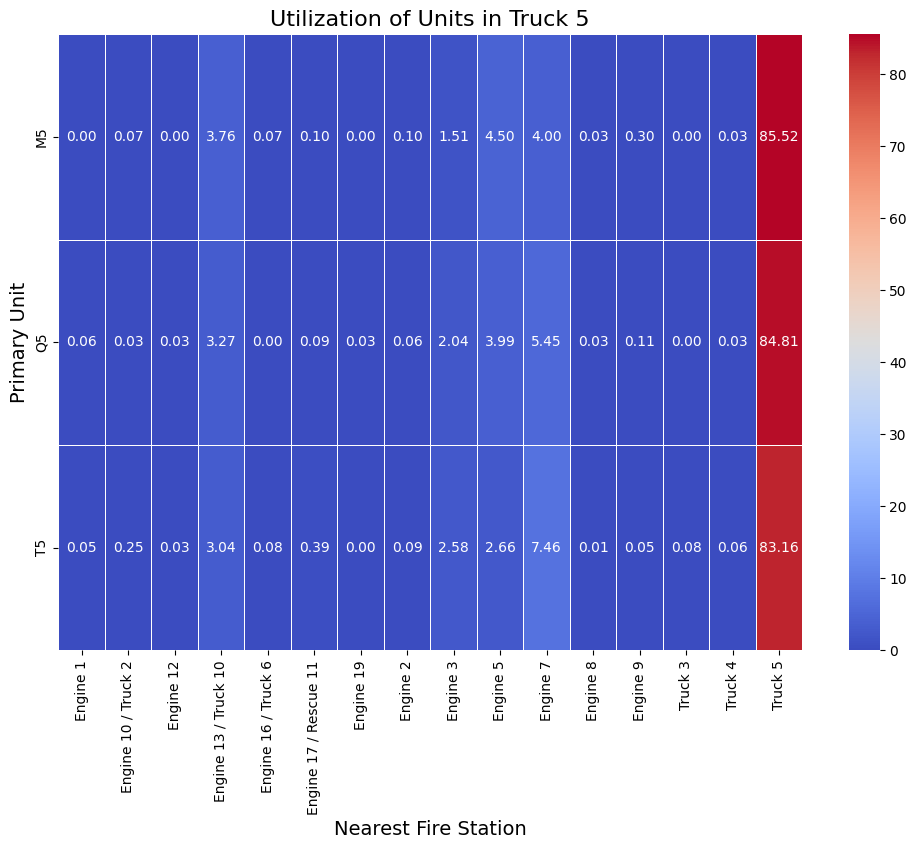

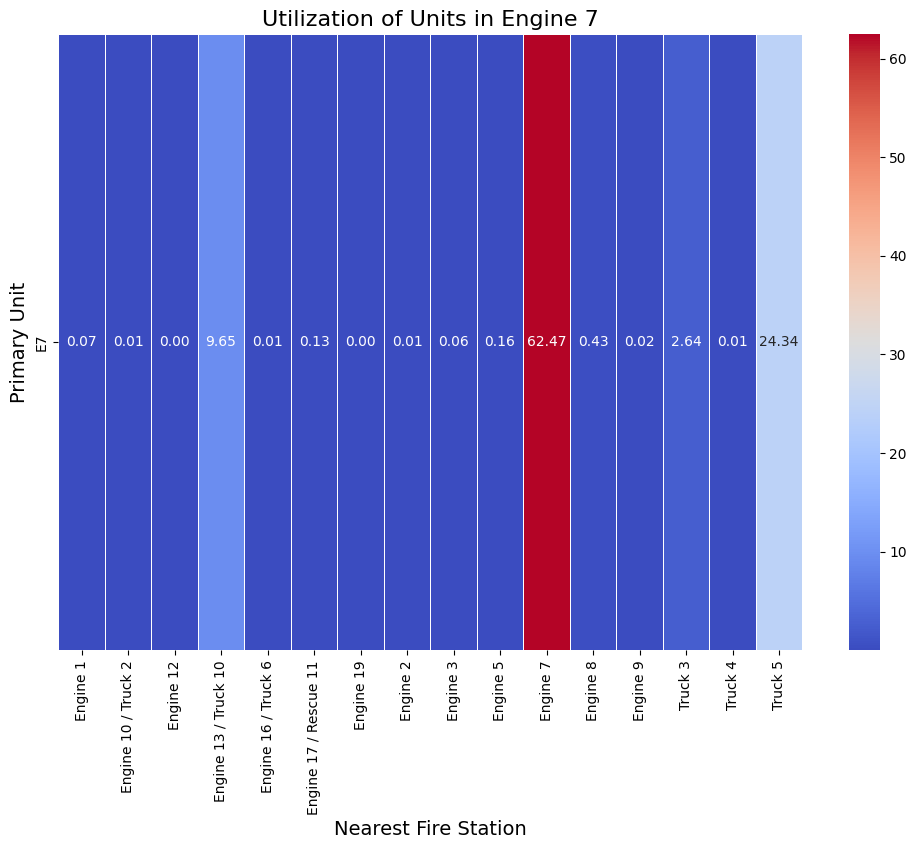

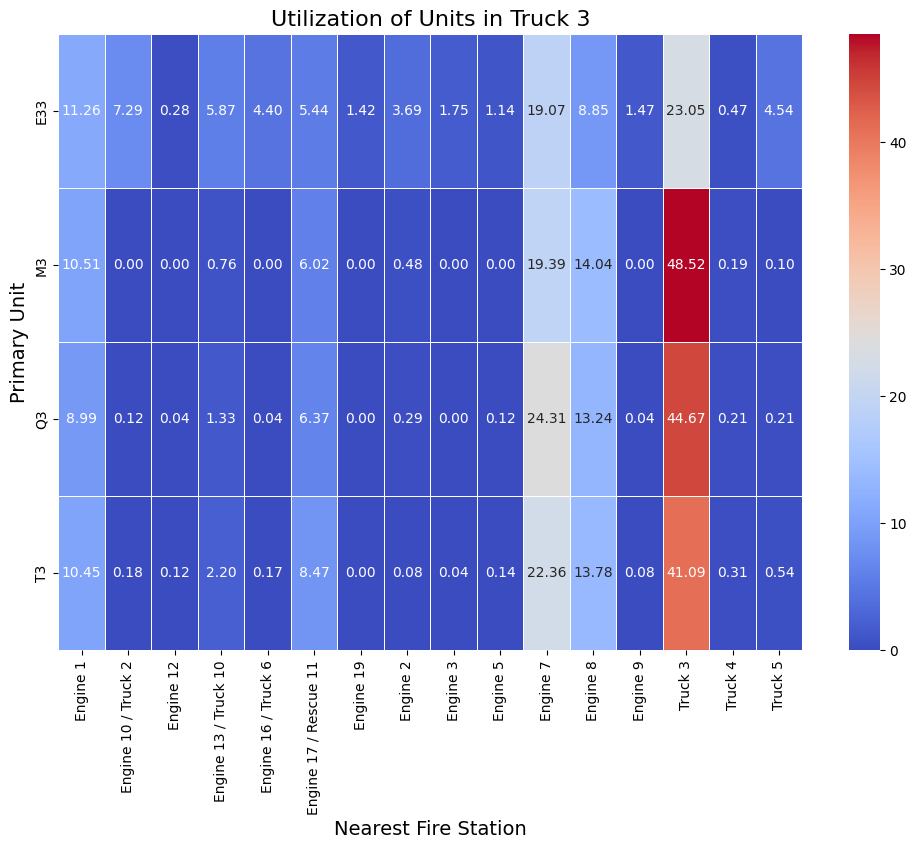

In [4]:
# Define the list of all units
all_units = [unit for units in fire_station_apparatus.values() for unit in units]

# Filter data for incidents involving any of the units under the fire stations
filtered_incidents = incident[incident['primary_unit'].isin(all_units)]

# Step 1: Loop through each fire station and its units
for fire_station, units in fire_station_apparatus.items():
    # Filter incidents for this fire station's units
    station_incidents = filtered_incidents[filtered_incidents['primary_unit'].isin(units)]
    
    # Step 2: Group incidents by primary unit and nearest station
    station_response_group = station_incidents.groupby(['primary_unit', 'nearest_station_name']).size().reset_index(name='incident_count')
    
    # Step 3: Calculate total incidents per primary unit to get the percentage of utilization
    station_response_group['total_incidents'] = station_response_group.groupby('primary_unit')['incident_count'].transform('sum')
    station_response_group['percentage'] = (station_response_group['incident_count'] / station_response_group['total_incidents']) * 100
    
    # Step 4: Pivot the data to create a matrix for the heatmap
    heatmap_data = station_response_group.pivot(index='primary_unit', columns='nearest_station_name', values='percentage').fillna(0)

    # Step 5: Plot the heatmap for the current fire station
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

    # Set labels and title
    plt.title(f'Utilization of Units in {fire_station}', fontsize=16)
    plt.xlabel('Nearest Fire Station', fontsize=14)
    plt.ylabel('Primary Unit', fontsize=14)

    # Show the plot
    plt.show()

Comments: Almost all the units in each fire station deals with incidents near their assigned fire station. Only unit 'E12' is being used more for incidents that are near fire station 'Enine 9' compared to it's assigned station 'Engine 12'. But it is not a point of concern because both fire stations are nearby and 'E12' is the only unit in Fire Station 'Engine 12' so we will not advice to relocate E12.

In [5]:
filtered_rows = incident[(incident['primary_unit'] == 'WR1')]
filtered_rows.shape[0]

4

Unit 'WR1' is used more by 'Engine 17 / Rescue 11' compared to it's assigned station 'Engine 2'. But the unit has been used only 4 times throught out the years so we wouldn't relocate it.

In [6]:
filtered_rows = incident[(incident['primary_unit'] == 'B1')]
filtered_rows.shape[0]

12802

Unit 'B1' is assigned to firestation 'Engine 16 / Truck 6' but it attends more incidnet near station 'Engine 2' but both the station are nearby. We don't think it needs to be reallocated.

In [7]:
filtered_rows = incident[(incident['primary_unit'] == 'HM2')]
filtered_rows.shape[0]

1

Since Unit 'HM2' has only been used once we will not change it's allocation.

# Catagorizing the Units based on their use

In [8]:
#Unit Types
unit_type = {
    'Engine with jaws of life tool': ['E1', 'E10'],
    'Engine': ['E19', 'E2', 'E16', 'E9', 'E12', 'E13', 'E5', 'E3', 'E7', 'E33'],
    'Engine deals with Hazardous': ['E17'],
    'Truck': ['T2', 'T6', 'T4', 'T10', 'T3', 'T5'],
    'Midis': ['M1', 'M2', 'M6', 'M7', 'M9', 'M8', 'M5', 'M3'],
    'Quints': ['Q1', 'Q2', 'Q6', 'Q7', 'Q4', 'Q9', 'Q8', 'Q5', 'Q3'],
    'Battalion': ['B1', 'B2'],
    'Rescue vehicle': ['R11'],
    'Fire Investigation': ['CAR91', 'CAR92', 'CAR93', 'CAR94', 'CAR98'],
    'Safety Officer': ['CAR99'],
    'Water Rescue': ['WR1'],
    'Confined Space Rescue': ['SO1','SO2'],
    'Protectives': ['P'],
    'Hazardous Materials' : ['HM1','HM2'],
    'Trench Rescue': ['TR1','TR2'],
    'Marine': ['FIREBOAT1'],
    'LDC': ['LDC']
}

# Incident type proportion per unit type

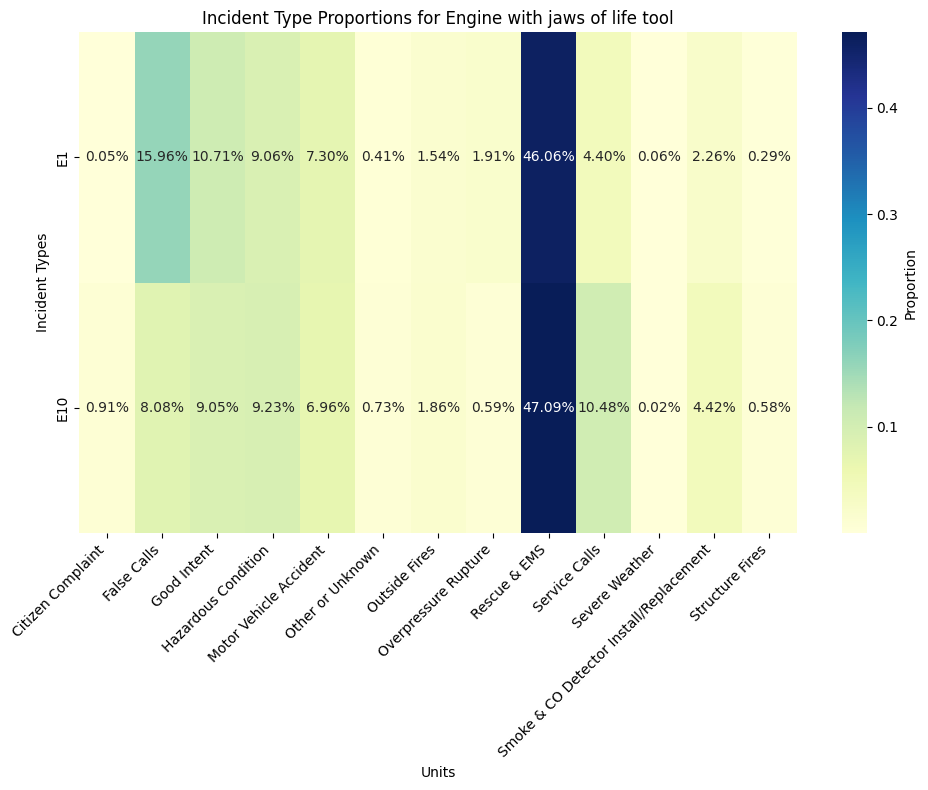

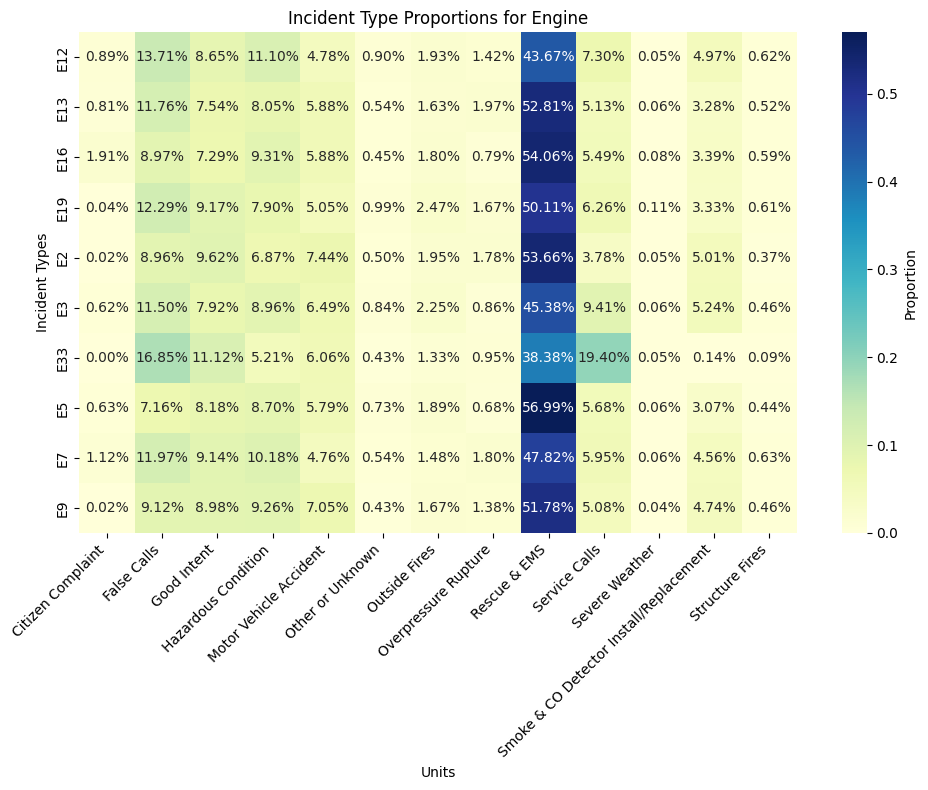

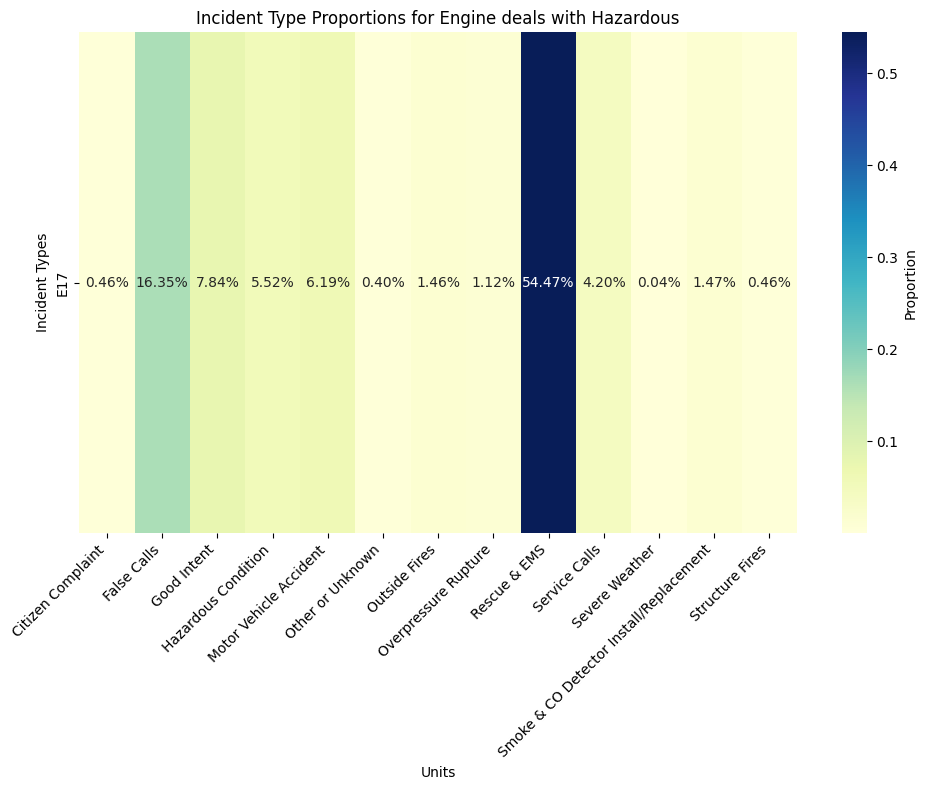

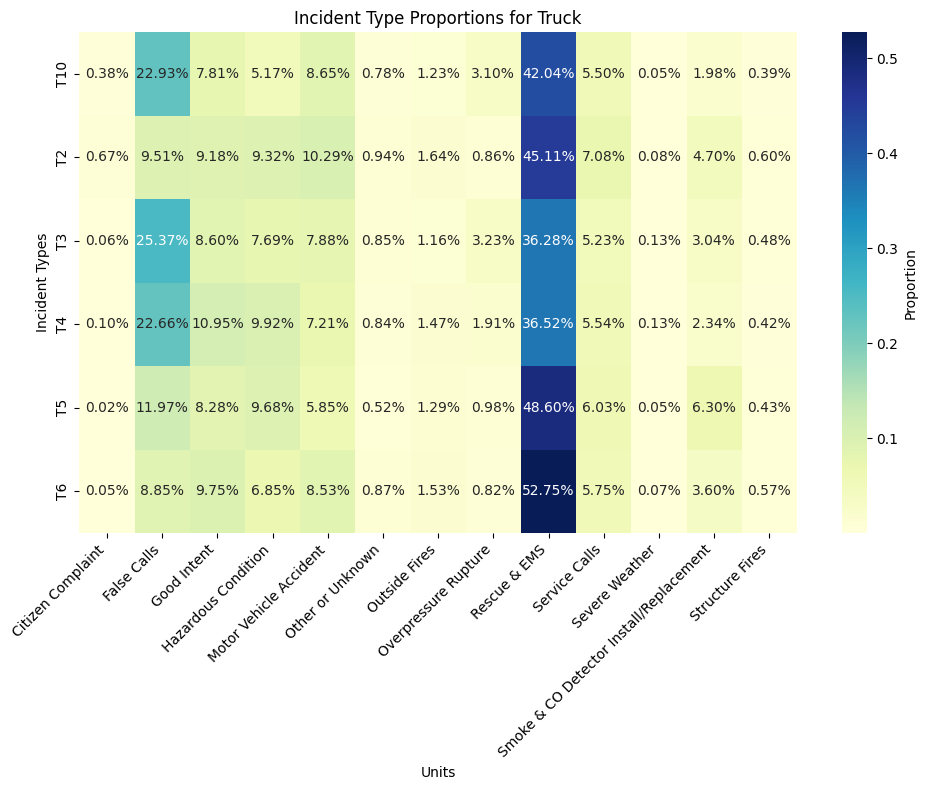

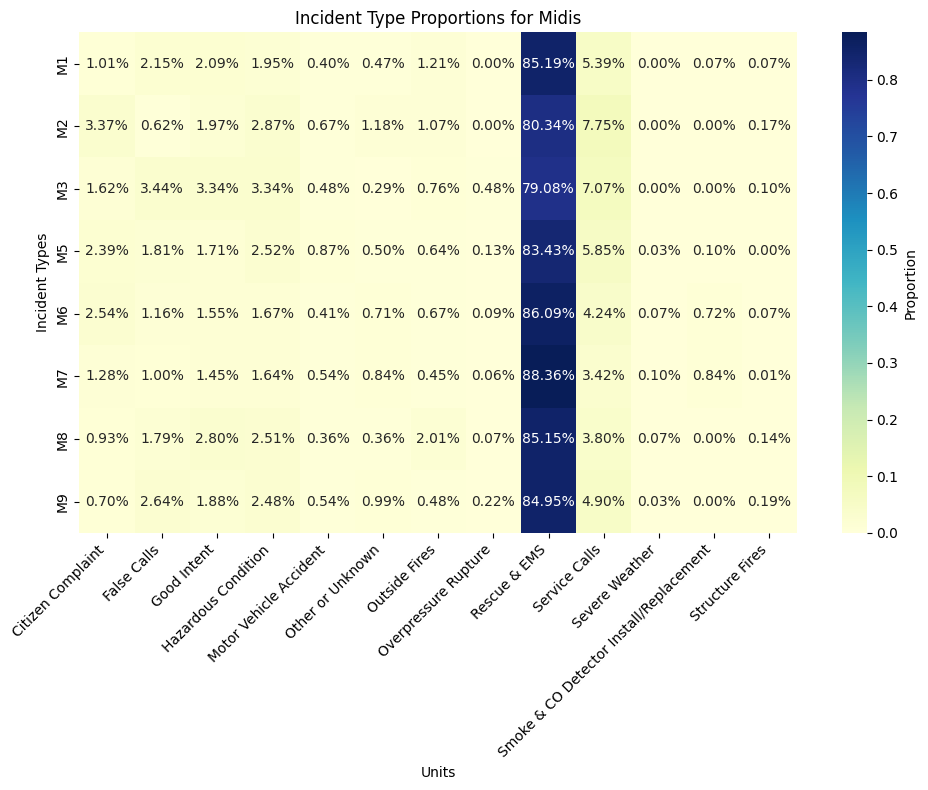

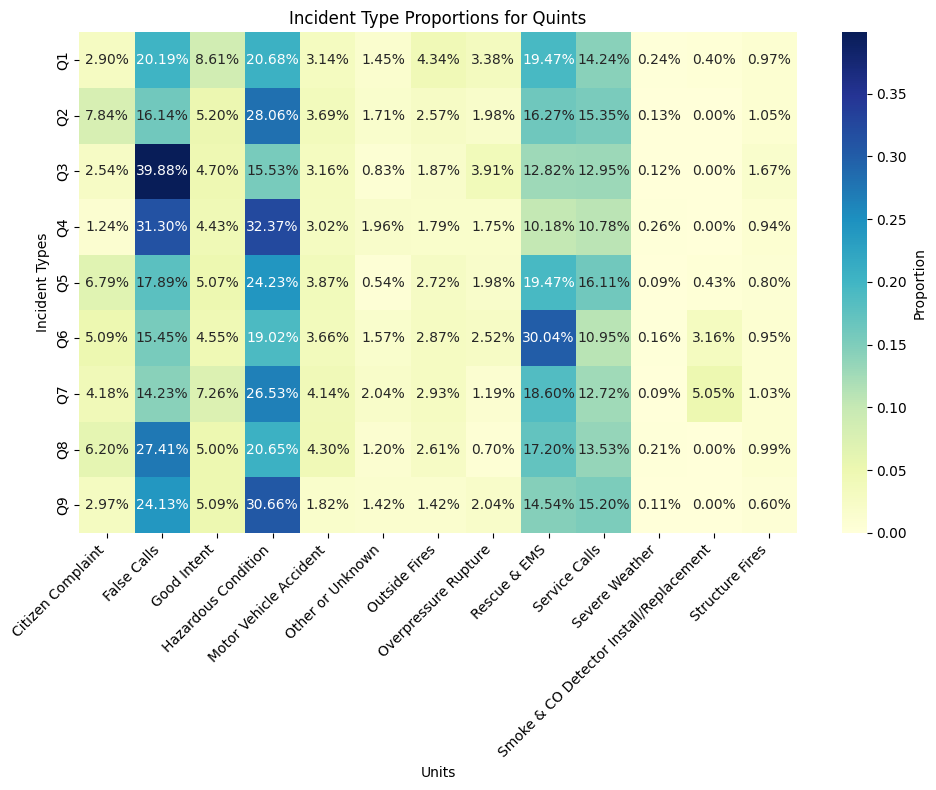

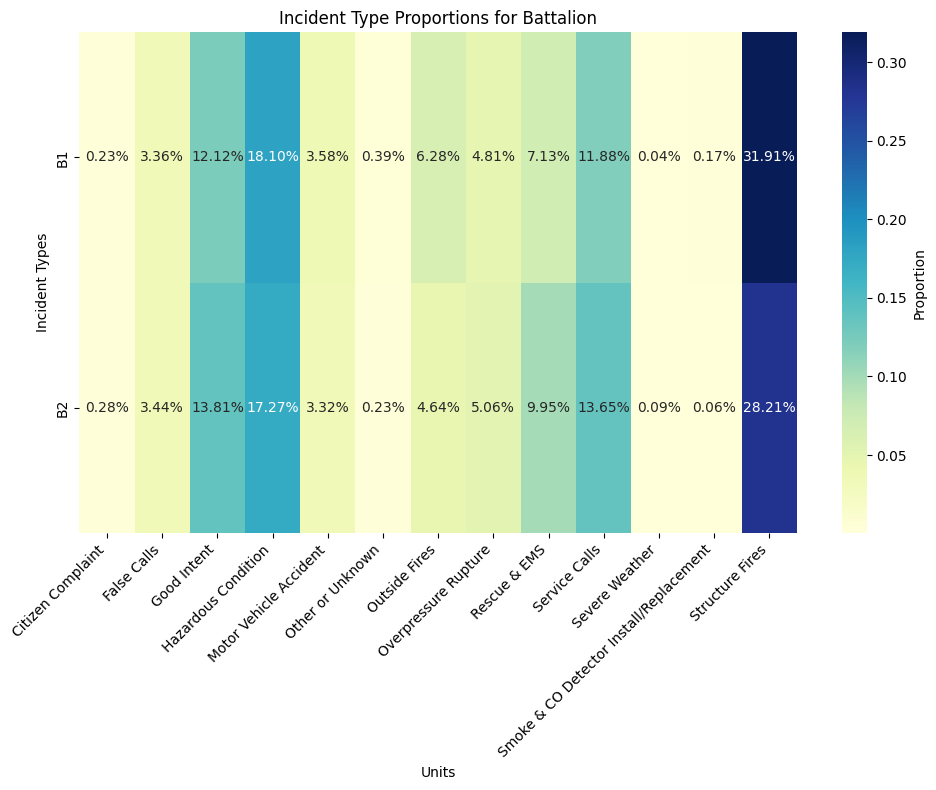

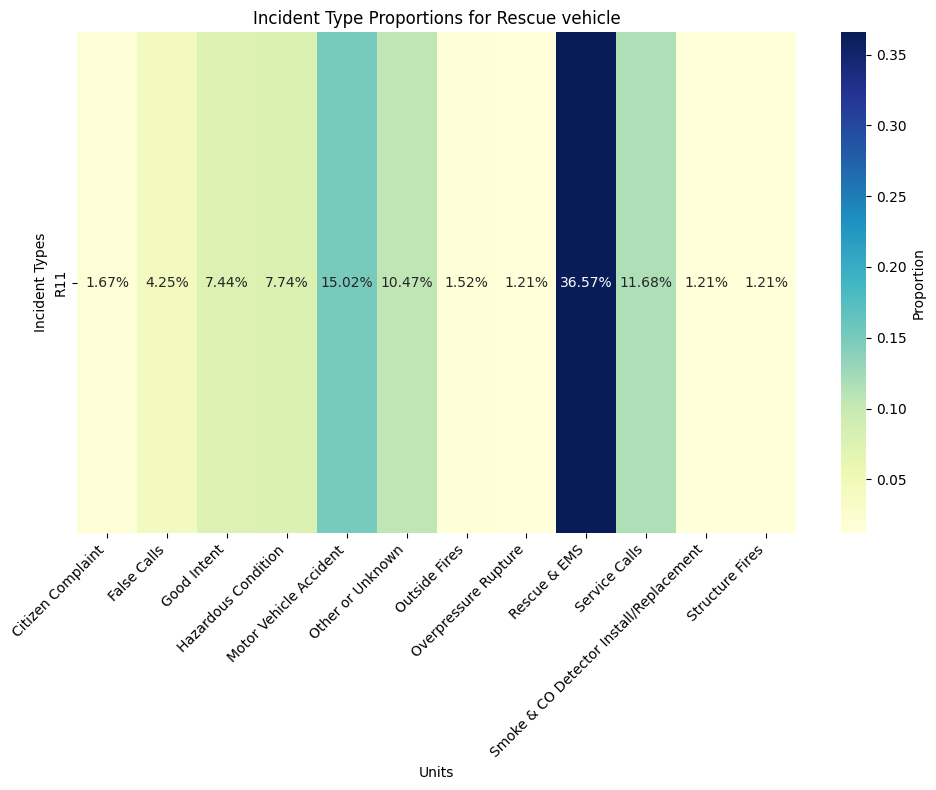

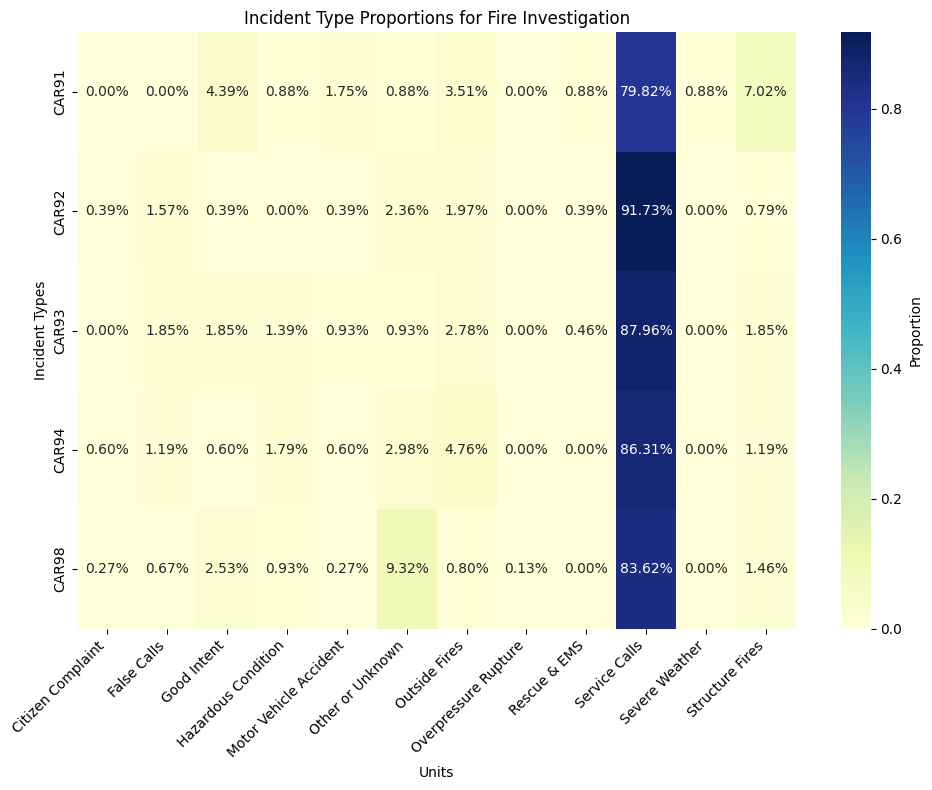

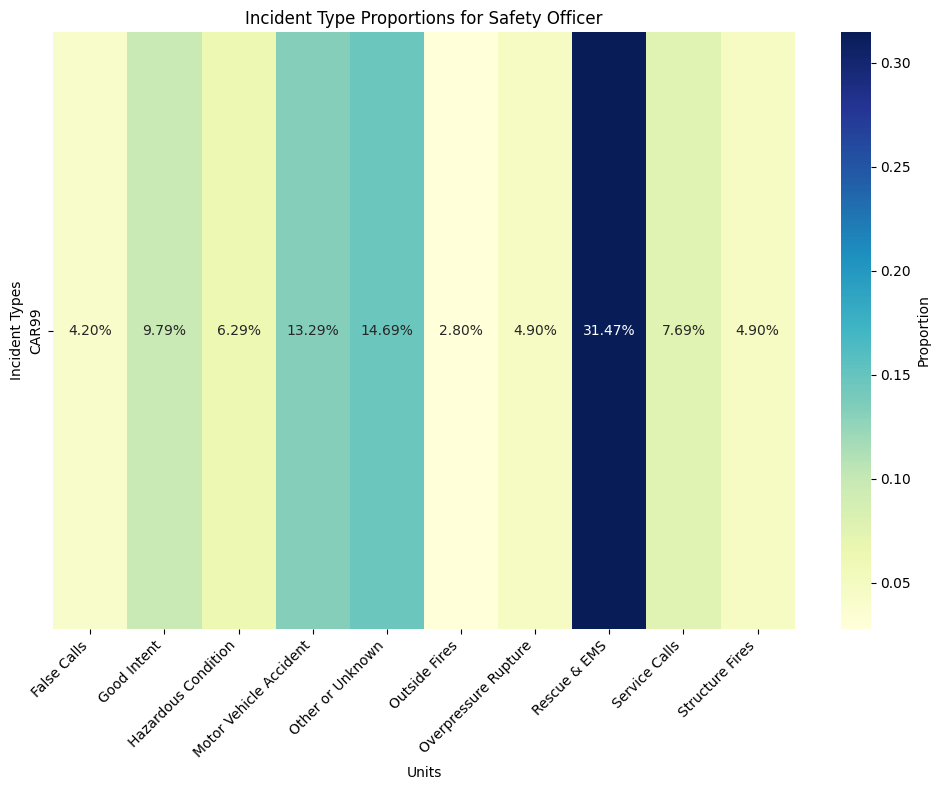

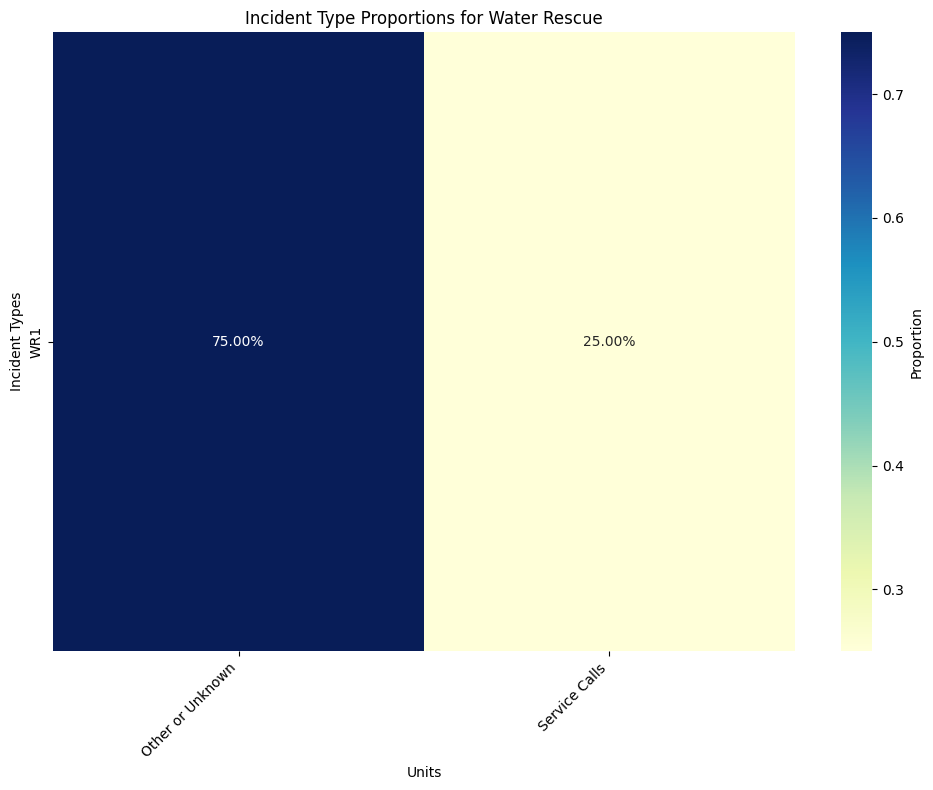

The following units in 'Confined Space Rescue' have no incident data: SO2, SO1
No data available for unit type: Confined Space Rescue


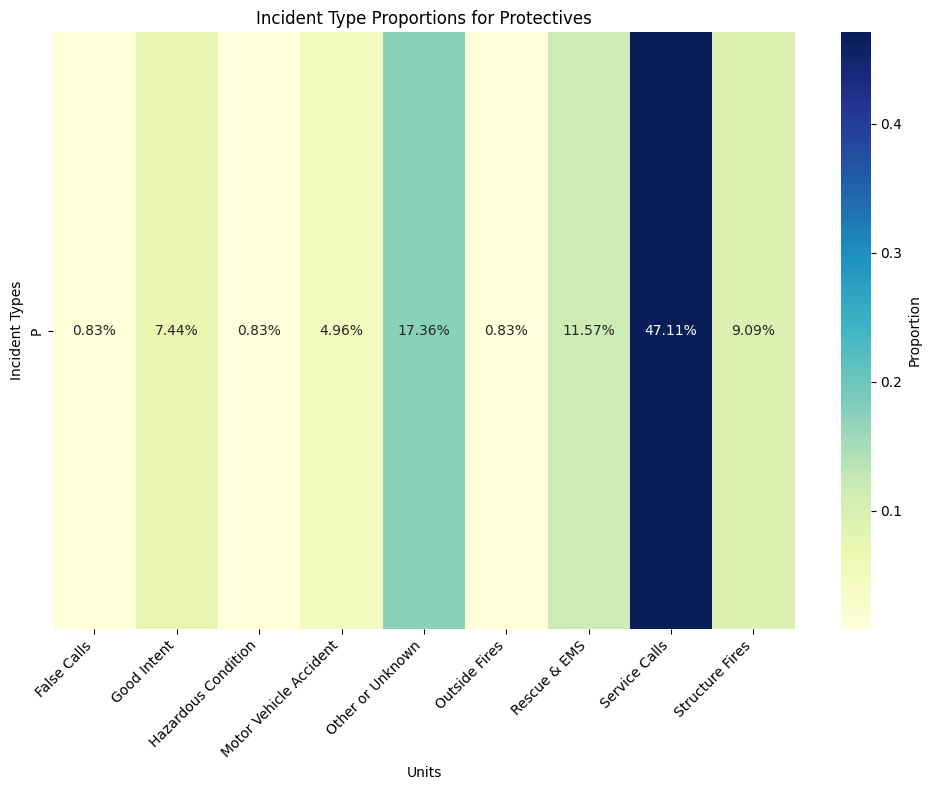

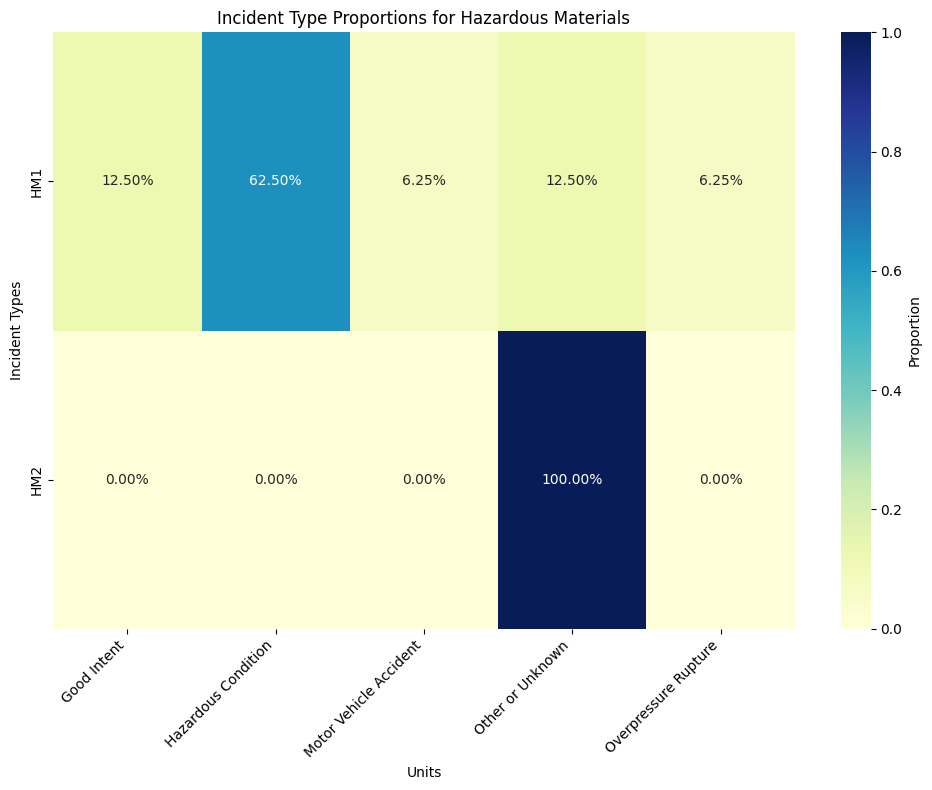

The following units in 'Trench Rescue' have no incident data: TR2, TR1
No data available for unit type: Trench Rescue


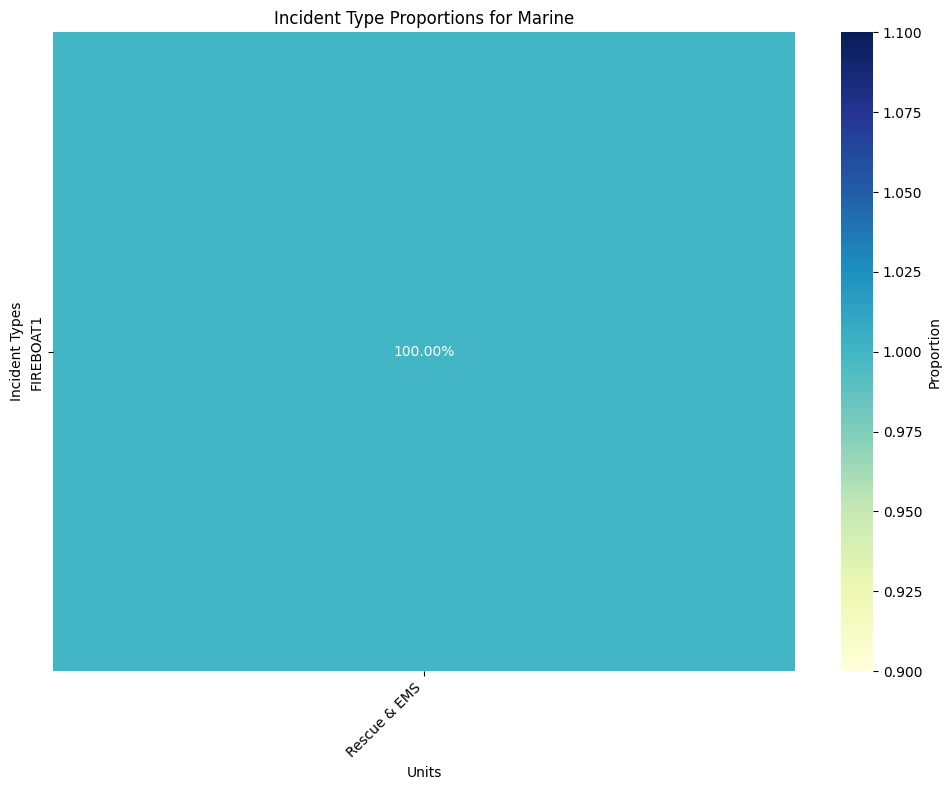

The following units in 'LDC' have no incident data: LDC
No data available for unit type: LDC


In [9]:
# Loop through each unit type in the unit_type dictionary
for unit_category, units in unit_type.items():
    # Filter the incident data to include only rows where 'primary_unit' is in the current unit list
    filtered_data = incident[incident['primary_unit'].isin(units)]
    
    # Group data by unit and incident type, then count occurrences
    heatmap_data = filtered_data.groupby(['primary_unit', 'inctype_grouped_descr']).size().unstack(fill_value=0)
    
    # Identify units with no data
    units_with_data = set(heatmap_data.index)
    units_without_data = set(units) - units_with_data
    
    # Print which units have no data
    if units_without_data:
        print(f"The following units in '{unit_category}' have no incident data: {', '.join(units_without_data)}")
    
    # Check if there is valid data to plot
    if heatmap_data.empty:
        print(f"No data available for unit type: {unit_category}")
        continue  # Skip to the next iteration
    
    # Normalize to get proportions by dividing each value by the total per unit
    heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)
    
    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2%", cbar_kws={'label': 'Proportion'}, xticklabels=True, yticklabels=True)
    plt.title(f'Incident Type Proportions for {unit_category}')
    plt.xlabel('Units')  # Units on the x-axis
    plt.ylabel('Incident Types')  # Incident Types on the y-axis
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()